<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
from collections import namedtuple

User = namedtuple('User', ['purchased', 'time_on_site', 'mobile'])
example_user = User(False, 12, False)
example_user

User(purchased=False, time_on_site=12, mobile=False)

In [4]:
example_user.time_on_site=30

AttributeError: ignored

In [2]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [32]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes (600 sec) on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60) # based on ecommerce data from 2016
  purchased = random.random() < 0.1 + (time_on_site / 1500) # 15 sec x 100%
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2.5*60)# based on ecommerce data from 2016
  purchased = random.random() < 0.3 + (time_on_site / 1500) 
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users) # shuffling is just good practice, especially for predictive modeling
users[:10]

[User(purchased=True, time_on_site=368.3818870369276, mobile=True),
 User(purchased=False, time_on_site=148.044691797363, mobile=False),
 User(purchased=True, time_on_site=668.2172486015669, mobile=False),
 User(purchased=True, time_on_site=621.4149288129579, mobile=True),
 User(purchased=True, time_on_site=443.58603515991297, mobile=True),
 User(purchased=False, time_on_site=506.7562869129816, mobile=True),
 User(purchased=True, time_on_site=687.6286823640582, mobile=True),
 User(purchased=True, time_on_site=725.5712305032962, mobile=True),
 User(purchased=True, time_on_site=435.0126393745839, mobile=True),
 User(purchased=False, time_on_site=804.4829530614045, mobile=False)]

In [33]:
import numpy as np

np.random.normal()

-0.4487249103051886

In [34]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,368.381887,True
1,False,148.044692,False
2,True,668.217249,False
3,True,621.414929,True
4,True,443.586035,True


In [43]:
user_data['time_on_site_min'] = user_data['time_on_site'] / 60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,True,368.381887,True,6.139698
1,False,148.044692,False,2.467412
2,True,668.217249,False,11.136954
3,True,621.414929,True,10.356915
4,True,443.586035,True,7.393101


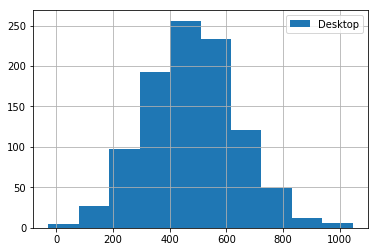

In [36]:
ax = user_data.time_on_site.hist()
ax.legend(['Desktop', 'Mobile']);

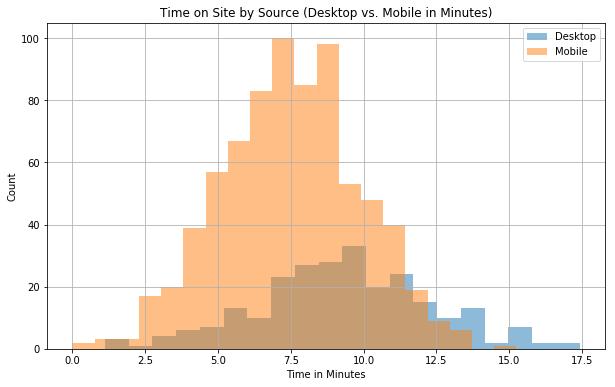

In [44]:
import matplotlib.pyplot as plt

user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6))
plt.title('Time on Site by Source (Desktop vs. Mobile in Minutes)')
plt.ylabel('Count')
plt.xlabel('Time in Minutes')
plt.legend(['Desktop', 'Mobile']);

In [40]:
user_data[user_data['time_on_site'] < 0.0]

,purchased,time_on_site,mobile,time_on_site_min
745,False,-28.203572,True,-0.47006


In [41]:
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0
user_data[user_data['time_on_site'] < 0.0]

,purchased,time_on_site,mobile,time_on_site_min


In [0]:
help(pd.crosstab)

In [46]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,0.0,36.03597350362935,66.68154396411148,69.6461078702697,77.30196212218999,85.35497595806885,89.60617853457029,90.59177858547815,125.80183832703102,127.43625695694732,127.48667598491005,146.79337537647393,147.20837230474035,148.044691797363,153.22010874668598,154.14015465280966,156.43328507299924,158.27989022150285,158.34915497263222,158.59281321173734,161.6553122626916,164.14545664765535,165.1303969343952,166.7319773194393,167.57287746386675,170.97279165264962,173.3522989926704,174.12087234558976,175.25806299496145,179.55284651125453,182.32034361269916,185.42436764344296,190.2196956619752,193.69466498070597,196.10684476369556,196.56991100388777,196.80969975087785,201.9203409233081,203.8094252353858,210.08554093653902,...,771.0349127891908,771.2711300125492,779.3722197828089,780.3129961708472,781.0505481613998,787.6740506117397,792.5419557401146,792.8486805511013,794.7158344463553,798.9573873503291,798.9722121928319,802.3827146662794,802.4108056421072,803.0250944462197,804.4829530614045,804.9411082644912,809.3421331824683,812.2989321253822,813.2016662346002,813.7516086969628,819.4664495435502,830.6370445847003,835.44815368985,836.8709015860128,840.6682502741154,847.9113841113927,870.1085635193042,880.7671015198723,905.5201724416565,907.1353809222867,915.2802558118325,919.5245475120882,929.2921777596334,930.0716519499647,941.0230555306548,942.5776021867257,958.2412454865073,991.3573319890991,1008.3715642389873,1045.6649798432124
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
True,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,...,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1


In [54]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'])

purchased,False,True
time_on_site_min,,
"(-0.0174, 3.486]",23,16
"(3.486, 6.971]",165,148
"(6.971, 10.457]",183,294
"(10.457, 13.942]",58,96
"(13.942, 17.428]",2,15


In [0]:
# above we haven't taken into account mobile or desktop


In [53]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.0174, 3.486]",0.053364,0.028120
"(3.486, 6.971]",0.382831,0.260105
"(6.971, 10.457]",0.424594,0.516696
"(10.457, 13.942]",0.134571,0.168717
"(13.942, 17.428]",0.004640,0.026362


In [55]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.54,0.394667
True,0.46,0.605333


In [63]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-0.0174, 3.486]  0.044444  0.057432  0.008696  0.033040
(3.486, 6.971]    0.185185  0.472973  0.130435  0.292952
(6.971, 10.457]   0.481481  0.398649  0.478261  0.526432
(10.457, 13.942]  0.274074  0.070946  0.260870  0.145374
(13.942, 17.428]  0.014815  0.000000  0.121739  0.002203

## Stanford Open Police Project

In [65]:
!unzip tr137st9964_tx_austin_2019_02_25.csv.zip
!ls

Archive:  tr137st9964_tx_austin_2019_02_25.csv.zip
  inflating: share/data/opp-for-archive/tx_austin_2019_02_25.csv  
sample_data  share  tr137st9964_tx_austin_2019_02_25.csv.zip


In [66]:
%%time
df = pd.read_csv('./share/data/opp-for-archive/tx_austin_2019_02_25.csv')
print(df.shape)


(435222, 20)
CPU times: user 1.82 s, sys: 199 ms, total: 2.02 s
Wall time: 2.02 s


In [67]:
df.head()

,raw_row_number,date,subject_age,subject_race,subject_sex,officer_id_hash,type,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year
0,141,2006-01-07,53.0,white,female,59c9092a79,vehicular,NaN,NaN,NaN,NaN,True,True,True,probable cause,VIOLATION OF TRANSPORTATION/VEHICLE LAWS,STRN,NaN,TX,1996.0
1,4819,2006-03-21,21.0,white,male,46f8ed46eb,vehicular,NaN,NaN,NaN,NaN,False,False,False,NaN,VIOLATION OF TRANSPORTATION/VEHICLE LAWS,CADI,NaN,TX,2000.0
2,4820,2006-03-21,43.0,black,female,0d1d4fb150,vehicular,NaN,NaN,NaN,NaN,False,False,False,NaN,VIOLATION OF TRANSPORTATION/VEHICLE LAWS,KIA,NaN,TX,2003.0
3,4821,2006-04-20,46.0,hispanic,male,c70bca9788,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,VIOLATION OF CITY ORDINANCE,KW,NaN,TX,1994.0
4,4822,2006-03-21,25.0,white,male,e3f693e058,vehicular,NaN,NaN,NaN,NaN,False,False,False,NaN,VIOLATION OF TRANSPORTATION/VEHICLE LAWS,GMC,NaN,TX,2002.0


In [69]:
df.isna().sum()

raw_row_number                     0
date                               0
subject_age                    14767
subject_race                    2146
subject_sex                     7748
officer_id_hash                    0
type                           80175
contraband_found              427515
contraband_drugs              429512
contraband_weapons            429078
frisk_performed               422843
search_conducted               76844
search_person                  44596
search_vehicle                 73062
search_basis                  419155
reason_for_stop                    5
vehicle_make                    9396
vehicle_model                 297026
vehicle_registration_state     13040
vehicle_year                  110886
dtype: int64

In [82]:
df['type'].value_counts()

vehicular    355047
Name: type, dtype: int64

In [75]:
df['vehicle_make'].value_counts(normalize=True).head(10)  #normalize gives a percent, head(10) shows us the top 10

FORD    0.121042
CHEV    0.116792
TOYT    0.088987
HOND    0.080448
NISS    0.055123
DODG    0.047362
MAZD    0.030956
JEEP    0.021330
HYUN    0.018980
BUIC    0.018893
Name: vehicle_make, dtype: float64

In [85]:
df[df['vehicle_make'] == 'FORD']['subject_sex'].value_counts()

male      35921
female    14586
Name: subject_sex, dtype: int64

In [76]:
df['reason_for_stop'].value_counts()

VIOLATION OF TRANSPORTATION/VEHICLE LAWS                                                                                               339565
OTHER                                                                                                                                   32567
VIOLATION OF CITY ORDINANCE                                                                                                             29834
CALL FOR SERVICE                                                                                                                        13751
SUSPICIOUS PERSON / VEHICLE                                                                                                             13118
WATER SAFETY ACT                                                                                                                         2457
PRE-EXISTING KNOWLEDGE                                                                                                                   1393
VIOLAT

In [87]:
df = pd.DataFrame({'a': np.arange(1e6),
                  'b': 2*np.arange(1e6)})
print(df.shape)
df.head()

(1000000, 2)


,a,b
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0


In [88]:
%timeit df['c'] = df['a'] ** 2

100 loops, best of 3: 15.9 ms per loop


In [93]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

# if you were working with a larger data set, this time 
# difference would be much more impactful 

1 loop, best of 3: 310 ms per loop


In [95]:
from tqdm import tqdm # this gives you a progress bar functionality! 
tqdm.pandas()
%timeit df['c2'] = df['a'].progress_apply(lambda x: x**2)

100%|██████████| 1000000/1000000 [00:01<00:00, 710798.39it/s]

1 loop, best of 3: 1.42 s per loop


In [91]:
df.head()

,a,b,c,c2
0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.0,1.0
2,2.0,4.0,4.0,4.0
3,3.0,6.0,9.0,9.0
4,4.0,8.0,16.0,16.0


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/lechemrc/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', )
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)